In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
sns.set_palette("Set3")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("House price.csv", index_col="Id")

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.shape

(1460, 80)

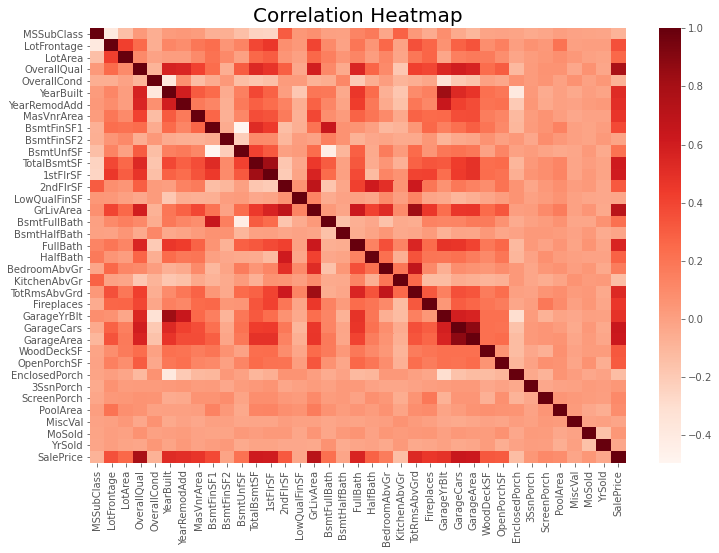

In [7]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap = "Reds")
plt.title("Correlation Heatmap", fontsize = 20);

In [8]:
cor = pd.DataFrame(df.corr()["SalePrice"].sort_values(ascending = False))
cor.columns = ["Correlation"]
cor[0:12]

,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [9]:
#dropping variables with <0.5 correlation.
low_var = (abs(cor.Correlation<0.5))[11:].index

df.drop(low_var, axis = 1, inplace = True)

In [10]:
df.shape

(1460, 54)

# Checking Null Values

In [11]:

na_vars = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
na_vars


nas = pd.DataFrame(na_vars)
nas["Percent"] = (na_vars.values / len(df) * 100)
nas.columns = ["Nulls", "Percent"]
nas

,Nulls,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945
BsmtFinType2,38,2.602740


In [12]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis = 1, inplace = True)

In [13]:
df.drop(["GarageType", "GarageFinish", "GarageCond",
        "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1"], axis = 1, inplace = True)

In [14]:
na_vars = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
nas = pd.DataFrame(na_vars)
nas["Percent"] = (na_vars.values / len(df) * 100)
nas.columns = ["Nulls", "Percent"]
nas

,Nulls,Percent
GarageQual,81,5.547945
BsmtQual,37,2.534247
MasVnrType,8,0.547945
Electrical,1,0.068493


In [15]:
df.GarageQual = df.GarageQual.fillna(0)
df.BsmtQual = df.BsmtQual.fillna(0)
df.MasVnrType = df.MasVnrType.fillna(df.MasVnrType.mode()[0])
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])

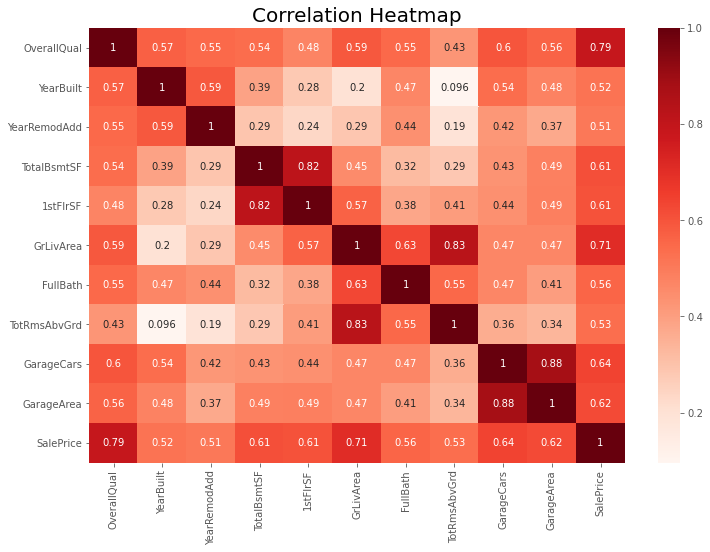

In [16]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap = "Reds", annot = True)
plt.title("Correlation Heatmap", fontsize = 20);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  YearBuilt      1460 non-null   int64 
 14  YearRemodAdd   1460 non-null   int64 
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

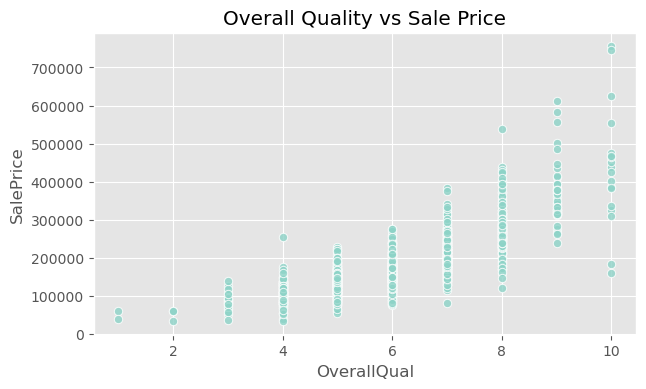

In [18]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='OverallQual', alpha=0.8)
plt.title("Overall Quality vs Sale Price");

Text(0.5, 1.0, 'Above Grade Living Area vs Sale Price')

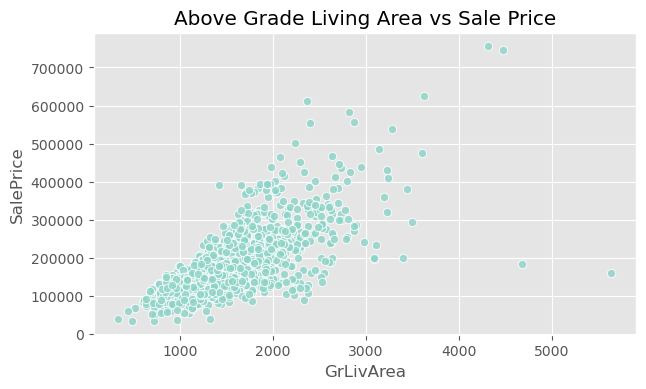

In [19]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='GrLivArea', alpha=0.8)
plt.title("Above Grade Living Area vs Sale Price")

In [20]:
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

# Checking VIF

In [21]:
#scaling the numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.select_dtypes(
    include = ["int64", "float64"]).drop("SalePrice", axis = 1))

X = pd.DataFrame(X, columns = list(df.select_dtypes(
    include = ["int64", "float64"]).drop("SalePrice", axis = 1)))

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,OverallQual,2.760282
1,YearBuilt,2.346831
2,YearRemodAdd,1.748655
3,TotalBsmtSF,3.374271
4,1stFlrSF,3.422353
5,GrLivArea,5.035587
6,FullBath,2.224330
7,TotRmsAbvGrd,3.378573
8,GarageCars,5.422890
9,GarageArea,4.953638


# Checking Skewness and Kurtosis

***If skewness < 3 AND 2 > kurtosis > -2, it means normal distribution. Else, I will make a logaritmic transformation to make it normal distribution.***

In [23]:
skewness_list = []
kurtosis_list = []
dfsk = pd.DataFrame(df.select_dtypes(include = ["int64", "float64"]).columns, columns = ["Variable"])

for var in df.select_dtypes(include = ["int64", "float64"]).columns:
    skewness_list.append(df[var].skew())
    kurtosis_list.append(df[var].kurtosis())
dfsk["Skewness"] = skewness_list
dfsk["Kurtosis"] = kurtosis_list
dfsk

,Variable,Skewness,Kurtosis
0,OverallQual,0.200786,0.074960
1,YearBuilt,-0.612295,-0.439826
2,YearRemodAdd,-0.501838,-1.273920
3,TotalBsmtSF,0.511703,1.770105
4,1stFlrSF,0.887637,1.117385
5,GrLivArea,1.010992,2.063463
6,FullBath,0.031271,-0.869968
7,TotRmsAbvGrd,0.660502,0.857578
8,GarageCars,-0.342377,0.222108
9,GarageArea,0.131748,0.761293


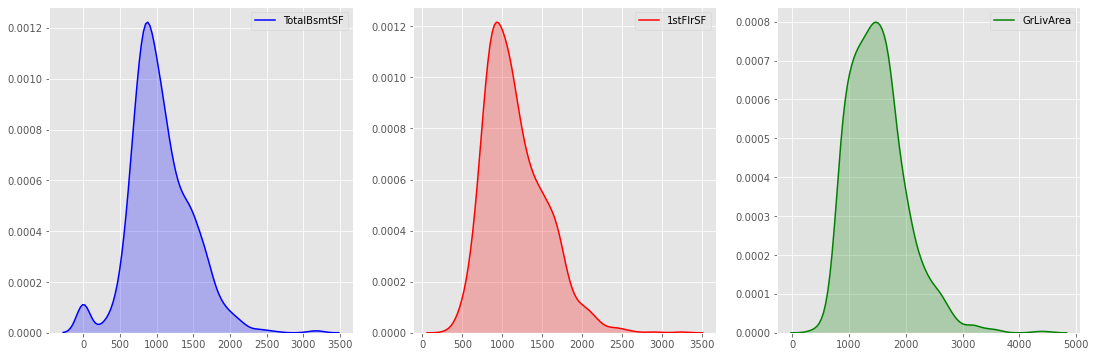

In [24]:
plt.figure(figsize = (25,6))

plt.subplot(1,4,1)
sns.kdeplot(df.TotalBsmtSF, shade = True, color = "b")

plt.subplot(1,4,2)
sns.kdeplot(df["1stFlrSF"], shade = True, color = "r")

plt.subplot(1,4,3)
sns.kdeplot(df.GrLivArea, shade = True, color = "g")

#plt.subplot(1,4,4)
#sns.kdeplot(df.SalePrice, shade = True, color = "orange")
#plt.show()


In [25]:
df.TotalBsmtSF = np.sqrt(df.TotalBsmtSF)
df["1stFlrSF"] = np.log(df["1stFlrSF"])
df.GrLivArea = np.log(df.GrLivArea)

#df.SalePrice = np.log(df.SalePrice)

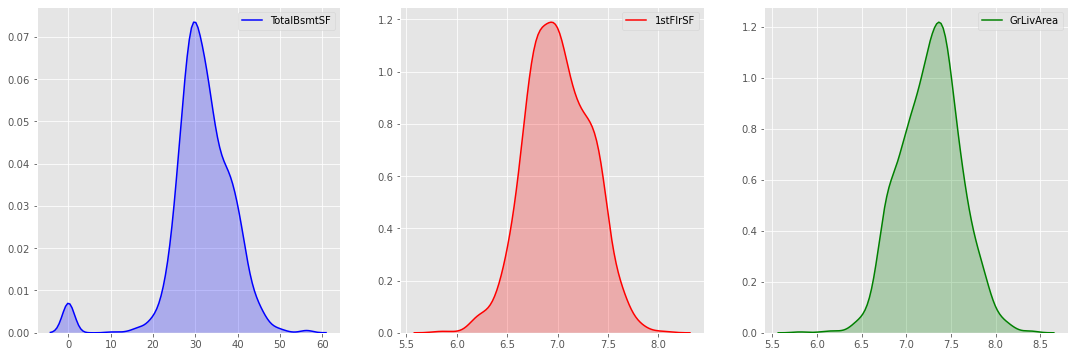

In [26]:
plt.figure(figsize = (25,6))

plt.subplot(1,4,1)
sns.kdeplot(df['TotalBsmtSF'], shade = True, color = "b")

plt.subplot(1,4,2)
sns.kdeplot(df["1stFlrSF"], shade = True, color = "r")

plt.subplot(1,4,3)
sns.kdeplot(df.GrLivArea, shade = True, color = "g")

#plt.subplot(1,4,4)
#sns.kdeplot(df.SalePrice, shade = True, color = "orange")
#plt.show()

# Checking Categorical Variables

In [27]:
dfo = df.select_dtypes(include = "object")
variables = dfo.columns

uniq_df = pd.DataFrame(variables, columns = ["Variable"])

unique_values = []
for var in variables:
    unique_values.append(dfo[var].unique())
    
uniq_df["Unique"] = unique_values
uniq_df

,Variable,Unique
0,MSZoning,"[RL, RM, C (all), FV, RH]"
1,Street,"[Pave, Grvl]"
2,LotShape,"[Reg, IR1, IR2, IR3]"
3,LandContour,"[Lvl, Bnk, Low, HLS]"
4,Utilities,"[AllPub, NoSeWa]"
5,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]"
6,LandSlope,"[Gtl, Mod, Sev]"
7,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
8,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."
9,Condition2,"[Norm, Artery, RRNn, Feedr, PosA, PosN, RRAn, ..."


***ExterQual - ExterCond - BsmtQual - HeatingQC - KitchenQual - GarageQual are ORDINAL***

***CentralAir is Y/N so we will convert it to 1/0***

In [28]:
#I will convert them to ordinal numeric values
df[["ExterQual", "ExterCond", "BsmtQual", "HeatingQC", "KitchenQual", "GarageQual"]].head()

,ExterQual,ExterCond,BsmtQual,HeatingQC,KitchenQual,GarageQual
Id,,,,,,
1,Gd,TA,Gd,Ex,Gd,TA
2,TA,TA,Gd,Ex,TA,TA
3,Gd,TA,Gd,Ex,Gd,TA
4,TA,TA,TA,Gd,Gd,TA
5,Gd,TA,Gd,Ex,Gd,TA


In [29]:
df.ExterQual = df.ExterQual.replace(["Gd", "TA", "Ex", "Fa"], [4, 3, 5, 2])
df.ExterCond = df.ExterCond.replace(["TA", "Gd", "Fa", "Po", "Ex"], [3, 4, 2, 1, 5])
df.BsmtQual = df.BsmtQual.replace(["Gd", "TA", "Ex", "Fa"], [4, 3, 5, 2])
df.HeatingQC = df.HeatingQC.replace(["Ex", "Gd", "TA", "Fa", "Po"], [5, 4, 3, 2, 1])
df.KitchenQual = df.KitchenQual.replace(["Gd", "TA", "Ex", "Fa"], [4, 3, 5, 2])
df.GarageQual = df.GarageQual.replace(["TA", "Fa", "Gd", "Ex", "Po"], [3, 2, 4, 5, 1])

df.ExterQual = df.ExterQual.astype("int64")
df.ExterCond = df.ExterCond.astype("int64")
df.BsmtQual = df.BsmtQual.astype("int64")
df.HeatingQC = df.HeatingQC.astype("int64")
df.KitchenQual = df.KitchenQual.astype("int64")
df.GarageQual = df.GarageQual.astype("int64")

df.CentralAir = df.CentralAir.replace(["Y", "N"], [1, 0])
df.CentralAir = df.CentralAir.astype("int64")

In [30]:
df[["ExterQual", "ExterCond", "BsmtQual", "HeatingQC", "KitchenQual", "GarageQual"]].head()

,ExterQual,ExterCond,BsmtQual,HeatingQC,KitchenQual,GarageQual
Id,,,,,,
1,4,3,4,5,4,3
2,3,3,4,5,3,3
3,4,3,4,5,4,3
4,3,3,3,4,4,3
5,4,3,4,5,4,3


In [31]:
df.dtypes.value_counts()

object     24
int64      15
float64     3
dtype: int64

In [32]:
#creating last df with dummies
df = pd.get_dummies(df, prefix = df.select_dtypes("object").columns,drop_first=True)
df.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,4,3,4,29.257478,5,1,6.752270,...,0,0,0,0,1,0,0,0,1,0
2,6,1976,1976,3,3,4,35.524639,5,1,7.140453,...,0,0,0,0,1,0,0,0,1,0
3,7,2001,2002,4,3,4,30.331502,5,1,6.824374,...,0,0,0,0,1,0,0,0,1,0
4,7,1915,1970,3,3,3,27.495454,4,1,6.867974,...,0,0,0,0,1,0,0,0,0,0
5,8,2000,2000,4,3,4,33.837849,5,1,7.043160,...,0,0,0,0,1,0,0,0,1,0


# Machine Learning Model

In [33]:
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']
y.shape


(1458,)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=2)


In [35]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     41.15
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          6.35e-301
Time:                        15:35:22   Log-Likelihood:                -11297.
No. Observations:                 976   AIC:                         2.291e+04
Df Residuals:                     820   BIC:                         2.367e+04
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.522e+05   2.54e+05     -2.568      0.010   -1.15e+06   -1.54e+05
OverallQual            9493.8266   1520.816      6.243      0.000    6508.676    1.25e+04
YearBuilt               -42.9361    104.982     -0.409      0.683    -249.001     163.129
YearRemodAdd             90.3381     73.554      1.228      0.220     -54.038     234.715
ExterQual              7808.6077   3129.301      2.495      0.013    1666.225     1.4e+04
ExterCond               744.3717   3217.971      0.231      0.817   -5572.060    7060.803
BsmtQual               7810.1447   2512.334      3.109      0.002    2878.782    1.27e+04
TotalBsmtSF             942.4565    322.177      2.925      0.004     310.068    1574.845
HeatingQC              1300.0679   1419.441      0.916      0.360   -1486.097    4086.233
CentralAir             5374.3275   5716.143      0.940      0.347   -5845.668    1.66e+04
1stFlrSF               3.002e+04   1.16e+04      2.595      0.010    7308.609    5.27e+04
GrLivArea              4.617e+04   1.28e+04      3.608      0.000    2.11e+04    7.13e+04
FullBath               5439.6227   2917.560      1.864      0.063    -287.142    1.12e+04
KitchenQual            1.011e+04   2482.759      4.074      0.000    5241.230     1.5e+04
TotRmsAbvGrd           1557.8206   1236.070      1.260      0.208    -868.414    3984.055
GarageCars             6462.4943   3370.426      1.917      0.056    -153.183    1.31e+04
GarageArea               18.8906     11.526      1.639      0.102      -3.733      41.514
GarageQual            -4364.4292   2012.520     -2.169      0.030   -8314.726    -414.132
MSZoning_FV            6.078e+04   1.95e+04      3.120      0.002    2.25e+04     9.9e+04
MSZoning_RH             4.34e+04   1.98e+04      2.190      0.029    4509.392    8.23e+04
MSZoning_RL            4.092e+04   1.69e+04      2.421      0.016    7744.422    7.41e+04
MSZoning_RM            3.974e+04    1.6e+04      2.478      0.013    8262.199    7.12e+04
Street_Pave            4943.9666   1.84e+04      0.269      0.788   -3.12e+04    4.11e+04
LotShape_IR2           9658.5040   6219.447      1.553      0.121   -2549.406    2.19e+04
LotShape_IR3            1.45e+04   1.17e+04      1.243      0.214   -8399.593    3.74e+04
LotShape_Reg           1624.4825   2477.808      0.656      0.512   -3239.112    6488.077
LandContour_HLS        1.777e+04   8347.961      2.129      0.034    1388.453    3.42e+04
LandContour_Low        5487.7580   9276.472      0.592      0.554   -1.27e+04    2.37e+04
LandContour_Lvl        1493.7349   6258.916      0.239      0.811   -1.08e+04    1.38e+04
Utilities_NoSeWa        5.22e-10   1.02e-09      0.513      0.608   -1.48e-09    2.52e-09
LotConfig_CulDSac      9983.3881   4919.428      2.029      0.043     327.233    1.96e+04
LotConfig_FR2          

In [36]:
a=pd.DataFrame([[var, variance_inflation_factor(x_train.values, x_train.columns.get_loc(var))] for var in x_train.columns],
                   index=range(x_train.shape[1]), columns=['Variable', 'VIF'])

C:\Users\mafaz\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


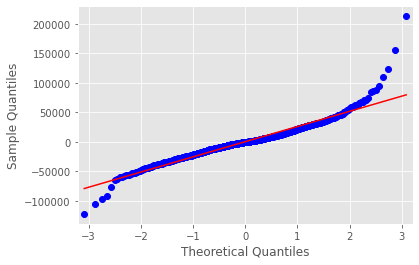

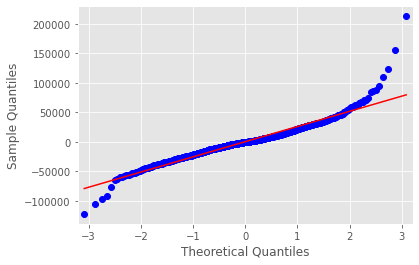

In [37]:
sm.qqplot(model.resid, line='s')

Text(0, 0.5, 'Residuals')

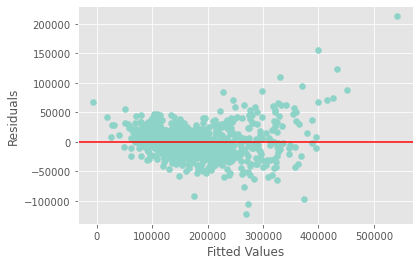

In [38]:
plt.scatter(model.predict(x_train), model.resid)
plt.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


Lambda value used for Transformation: -0.06693832863807474


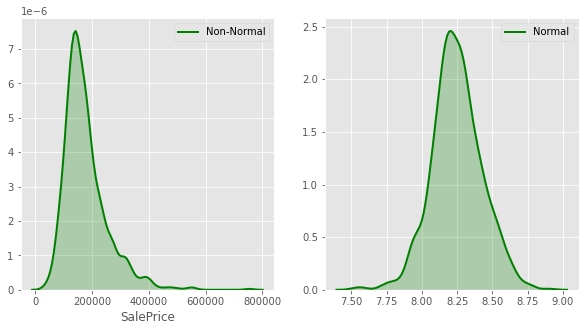

In [39]:
from scipy import stats
original_data = np.random.exponential(size = 1000)
fitted_data, fitted_lambda = stats.boxcox(y_train)
fig, ax = plt.subplots(1, 2)
sns.distplot(y_train, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
plt.legend(loc = "upper right")
fig.set_figheight(5)
fig.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [40]:
lambdaa=-0.06694
z=(((y_train**lambdaa) -  1)/lambdaa)
lr1 = sm.OLS(z, x_train , hasconst=True)
result = lr1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     63.42
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:35:25   Log-Likelihood:                 1557.0
No. Observations:                 976   AIC:                            -2802.
Df Residuals:                     820   BIC:                            -2040.
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.4650      0.484      9.219      0.000       3.514       5.416
OverallQual               0.0209      0.003      7.216      0.000       0.015       0.027
YearBuilt                 0.0002      0.000      1.120      0.263      -0.000       0.001
YearRemodAdd              0.0005      0.000      3.840      0.000       0.000       0.001
ExterQual                 0.0002      0.006      0.028      0.977      -0.012       0.012
ExterCond                 0.0073      0.006      1.197      0.232      -0.005       0.019
BsmtQual                  0.0106      0.005      2.204      0.028       0.001       0.020
TotalBsmtSF               0.0025      0.001      4.044      0.000       0.001       0.004
HeatingQC                 0.0082      0.003      3.025      0.003       0.003       0.014
CentralAir                0.0548      0.011      5.030      0.000       0.033       0.076
1stFlrSF                  0.0529      0.022      2.400      0.017       0.010       0.096
GrLivArea                 0.1643      0.024      6.733      0.000       0.116       0.212
FullBath                  0.0058      0.006      1.039      0.299      -0.005       0.017
KitchenQual               0.0132      0.005      2.792      0.005       0.004       0.023
TotRmsAbvGrd             -0.0005      0.002     -0.228      0.820      -0.005       0.004
GarageCars                0.0113      0.006      1.751      0.080      -0.001       0.024
GarageArea             4.219e-05    2.2e-05      1.920      0.055    -9.5e-07    8.53e-05
GarageQual                0.0033      0.004      0.852      0.394      -0.004       0.011
MSZoning_FV               0.2661      0.037      7.165      0.000       0.193       0.339
MSZoning_RH               0.2421      0.038      6.407      0.000       0.168       0.316
MSZoning_RL               0.2404      0.032      7.460      0.000       0.177       0.304
MSZoning_RM               0.2304      0.031      7.536      0.000       0.170       0.290
Street_Pave               0.0031      0.035      0.089      0.929      -0.066       0.072
LotShape_IR2              0.0200      0.012      1.684      0.093      -0.003       0.043
LotShape_IR3              0.0217      0.022      0.975      0.330      -0.022       0.065
LotShape_Reg             -0.0031      0.005     -0.661      0.509      -0.012       0.006
LandContour_HLS           0.0215      0.016      1.349      0.178      -0.010       0.053
LandContour_Low           0.0120      0.018      0.677      0.499      -0.023       0.047
LandContour_Lvl           0.0037      0.012      0.307      0.759      -0.020       0.027
Utilities_NoSeWa        7.27e-16   1.94e-15      0.375      0.708   -3.08e-15    4.54e-15
LotConfig_CulDSac         0.0102      0.009      1.092      0.275      -0.008       0.029
LotConfig_FR2          

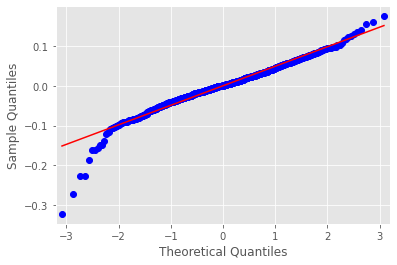

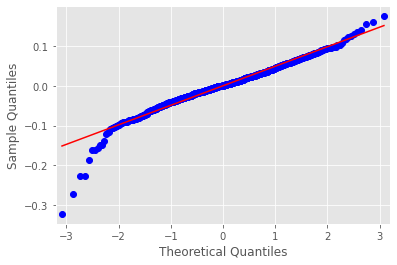

In [41]:
sm.qqplot((result.resid), line='s')

Text(0, 0.5, 'Residuals')

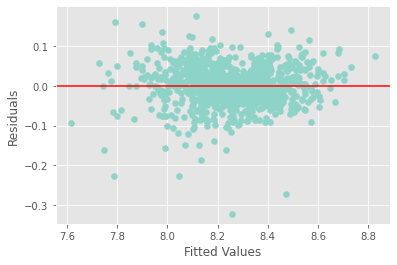

In [42]:
plt.scatter(result.predict(x_train), result.resid);
plt.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


In [43]:
from scipy.special import inv_boxcox
x_test = sm.add_constant(x_test)
c=result.predict(x_test)
a=inv_boxcox(c,-0.06694)

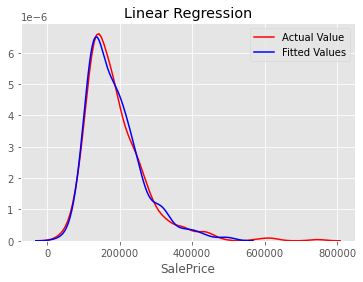

In [44]:



ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(a, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Linear Regression')


plt.show()
plt.close()

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,a))

28963.439454600095

In [47]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=75)
RFR.fit(x_train,z)
RFR.score(x_train,z)

0.979514026235691

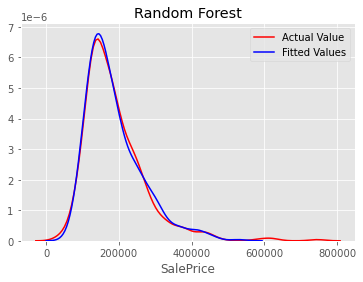

In [53]:
c=RFR.predict(x_test)
a=inv_boxcox(c,-0.06694)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(a, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Random Forest')
plt.show()
plt.close()

In [54]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,a))

34217.91390818597

In [55]:
import xgboost as xgb
from xgboost import XGBRegressor
XGB=XGBRegressor(n_estimators=1000,learning_rate=0.06,max_depth=45,random_state=0)
XGB.fit(x_train,z)
XGB.score(x_train,z)

0.9997747544787533

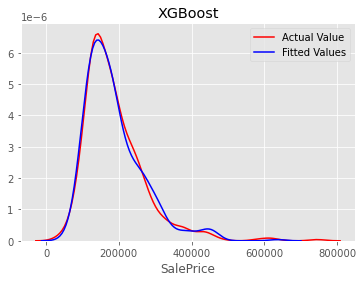

In [56]:
c=XGB.predict(x_test)
a=inv_boxcox(c,-0.06694)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(a, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('XGBoost')
plt.show()
plt.close()

In [52]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,a))

32080.681302608922